<h1>applications of LBP</h1>
<h5>Face detection</h5>
<h5>Face recognition</h5>
<h5>Facial expression recognition</h5>
<h5>Remote sensing</h5>
<h5>Texture classification</h5>
<h5>Object detection system</h5>

In [30]:
import os
import zipfile
import urllib
import numpy as np
from PIL import Image, ImageOps
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
from skimage.feature import local_binary_pattern
warnings.filterwarnings('ignore')

In [31]:
# download DataSet

file = 's3_photos.zip'
url = 'http://apmonitor.com/pds/uploads/Main/'+file
urllib.request.urlretrieve(url, file)

# extract archive and remove zip file
with zipfile.ZipFile(file, 'r') as zip_ref:
    zip_ref.extractall('./')
os.remove(file)

In [32]:
def computer_LBP(img_array):
  radius = 1
  n_points = 8 * radius
  n_bins = n_points+2

  lbp_image = local_binary_pattern(img_array, n_points, radius, method='uniform')
  lbp_image = lbp_image.ravel() # flatten

  features = np.zeros(n_bins)

  for i in lbp_image:
    features[int(i)] += 1

  features /= np.linalg.norm(features,ord=1) # normalize

  return features

In [33]:
def load_data(tag="train"):
  tag_dir = Path.cwd() / tag
  features = []
  labels = []

  for dir in tag_dir.iterdir():
    label = dir.stem # get label name

    for img_path in dir.glob('*.png'):
      img = Image.open(img_path.as_posix())

      if img.mode != 'L': # if image is not grayScale
        img = ImageOps.grayscale(img) # convert to grayScale
        img.save(img_path.as_posix()) # save image

      img_array = np.array(img) # convert to array
      feature = computer_LBP(img_array) # compute LBP
      features.append(feature)
      labels.append(label)

  return np.array(features), np.array(labels)

x_train, y_train = load_data()
x_test, y_test = load_data("test")

In [35]:
# get unique categories
labels = list(np.unique(np.array(y_train)))
labels

['Sand', 'Seed', 'Stone']

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_train = le.fit_transform(y_train)
label_test = le.transform(y_test)

In [38]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(x_train, label_train)

LinearSVC(random_state=0, tol=1e-05)

Accuracy: 100.00%


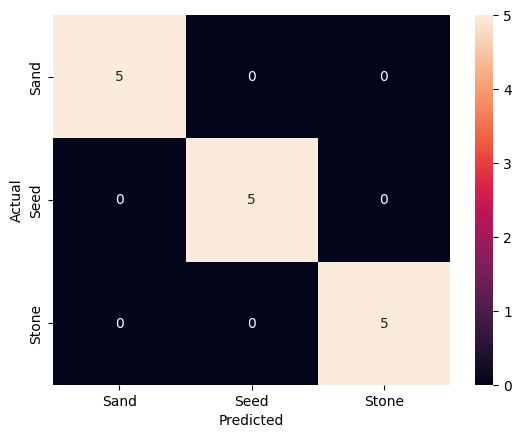

In [40]:
from sklearn import metrics
import seaborn as sns

prediction = clf.predict(x_test)
# visualization
cmat = metrics.confusion_matrix(prediction,label_test)
s = sns.heatmap(cmat,annot=True,xticklabels=labels, yticklabels=labels)
s.set(xlabel='Predicted', ylabel='Actual')
acc = cmat.trace() / cmat.sum()
print('Accuracy: {0:5.2f}%'.format(acc*100))